In [20]:
import urllib.request
import requests
import numpy as np
import pandas as pd
import sys,os,glob
from datetime import  datetime,timedelta
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings;
warnings.filterwarnings('ignore');

In [21]:
df = pd.read_csv('19952019.txt', sep=";", names = ['Индекс ВМО', 'Год', 'Месяц', 'День', 
                             'Общий признак качества температур',
                            'Минимальная температура воздуха',
                            'Средняя температура воздуха',
                            'Максимальная температура воздуха',
                            'Количество осадков'])
 

In [22]:
df['Time'] = df['Год'].astype(str) + df['Месяц'].astype(str) + df['День'].astype(str)
df

,Индекс ВМО,Год,Месяц,День,Общий признак качества температур,Минимальная температура воздуха,Средняя температура воздуха,Максимальная температура воздуха,Количество осадков,Time
0,24959,1995,1,1,0,-43.1,-37.9,-32.3,1.5,199511
1,24959,1995,1,2,0,-36.0,-33.5,-31.0,0.7,199512
2,24959,1995,1,3,0,-33.8,-31.0,-29.6,1.4,199513
3,24959,1995,1,4,0,-36.2,-34.0,-31.0,0.6,199514
4,24959,1995,1,5,0,-39.9,-38.0,-35.6,0.0,199515
...,...,...,...,...,...,...,...,...,...,...
8850,24959,2019,4,26,0,1.7,7.2,12.3,0.0,2019426
8851,24959,2019,4,27,0,-5.1,3.7,10.2,0.0,2019427
8852,24959,2019,4,28,0,0.9,6.7,13.3,0.6,2019428
8853,24959,2019,4,29,0,-0.3,2.4,6.3,0.0,2019429


In [23]:
column_names = ['Индекс ВМО', 
                'Time', 
                'Общий признак качества температур',
                'Минимальная температура воздуха',
                'Средняя температура воздуха',
                'Максимальная температура воздуха',
                'Количество осадков']

df = pd.DataFrame(df, columns=column_names)
df

,Индекс ВМО,Time,Общий признак качества температур,Минимальная температура воздуха,Средняя температура воздуха,Максимальная температура воздуха,Количество осадков
0,24959,199511,0,-43.1,-37.9,-32.3,1.5
1,24959,199512,0,-36.0,-33.5,-31.0,0.7
2,24959,199513,0,-33.8,-31.0,-29.6,1.4
3,24959,199514,0,-36.2,-34.0,-31.0,0.6
4,24959,199515,0,-39.9,-38.0,-35.6,0.0
...,...,...,...,...,...,...,...
8850,24959,2019426,0,1.7,7.2,12.3,0.0
8851,24959,2019427,0,-5.1,3.7,10.2,0.0
8852,24959,2019428,0,0.9,6.7,13.3,0.6
8853,24959,2019429,0,-0.3,2.4,6.3,0.0


In [33]:
df['Time'] = pd.to_datetime(df['Time'],format='%Y%m%d', errors='ignore')
start_date = '03-01-1996'
end_date = '06-01-1997'
freq='W' #выбирайте частота повторения
mask = (df['Time'] > start_date) & (df['Time'] <= end_date)
df = df.loc[mask]
df

,Индекс ВМО,Time,Общий признак качества температур,Минимальная температура воздуха,Средняя температура воздуха,Максимальная температура воздуха,Количество осадков
375,24959,1996-11-01,0,-38.8,-35.4,-25.0,0.0
376,24959,1996-11-02,0,-42.2,-39.5,-36.6,0.2
377,24959,1996-11-03,0,-44.6,-40.1,-35.5,0.0
378,24959,1996-11-04,0,-39.9,-38.2,-35.9,0.8
379,24959,1996-11-05,0,-41.9,-39.8,-37.2,0.6
...,...,...,...,...,...,...,...
878,24959,1997-05-28,0,6.2,13.4,20.1,0.0
879,24959,1997-05-29,0,5.4,17.7,26.8,0.0
880,24959,1997-05-30,0,3.5,10.2,21.3,0.0
881,24959,1997-05-31,0,2.5,7.5,13.7,0.0


         Time    Average
0  1996-03-03 -44.050000
1  1996-03-10 -32.228571
2  1996-03-17 -28.542857
3  1996-03-24 -27.000000
4  1996-03-31 -19.457143
..        ...        ...
61 1997-05-04  -4.171429
62 1997-05-11  -2.328571
63 1997-05-18   2.900000
64 1997-05-25   7.885714
65 1997-06-01   4.600000

[66 rows x 2 columns]


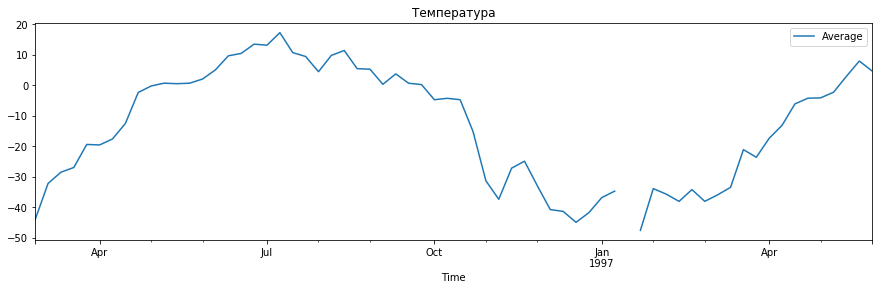

In [35]:
res = (df.groupby(pd.Grouper(key='Time',freq=freq,sort=True))['Минимальная температура воздуха'].
       mean().reset_index(name='Average'))
res.plot(x='Time', y='Average',title='Температура',figsize=(15,4))
print(res)

         Time    Average
0  1996-03-03 -37.050000
1  1996-03-10 -25.557143
2  1996-03-17 -22.157143
3  1996-03-24 -20.414286
4  1996-03-31 -13.471429
..        ...        ...
61 1997-05-04   2.942857
62 1997-05-11   3.242857
63 1997-05-18  10.571429
64 1997-05-25  13.585714
65 1997-06-01  11.685714

[66 rows x 2 columns]


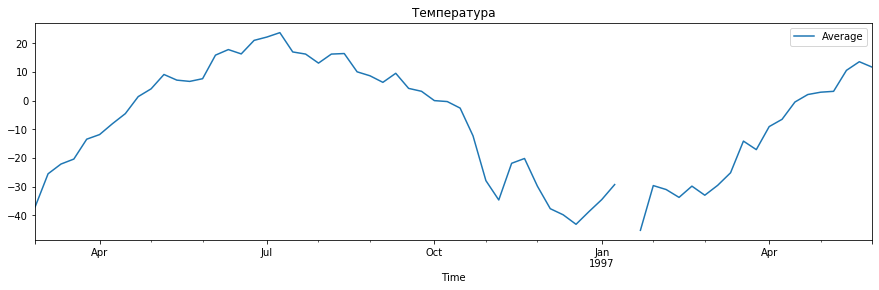

In [36]:
res = (df.groupby(pd.Grouper(key='Time',freq=freq,sort=True))['Средняя температура воздуха'].
       mean().reset_index(name='Average'))
res.plot(x='Time', y='Average',title='Температура',figsize=(15,4))
print(res)